In [1]:
import pandas as pd

In [2]:
# load the dataset
data = pd.read_csv('feature_seln_new.csv', parse_dates=['START_TIME'], index_col='START_TIME')
df=data[data.columns[1:]]

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 5]

'''lamda_list = [1.5,2,2.5,3,3.5,4,4.5,5,5.5,6] 
window_size_list = [12,24,36,48,60,72,84]'''

lamda_list = [1.5,2,2.5,3,3.5,4,4.5,5] 
window_size_list = [12,24,36,48,60,72,84,96]
no_col = len(df.columns)
no_rows = df.shape[0]

anomalies_array = np.zeros((len(lamda_list), len(window_size_list)))
#two_array = np.full((len(lamda_list), len(window_size_list)), 2)

for i in range(0,len(lamda_list)):
    lamda=lamda_list[i]
    for j in range(0,len(window_size_list)):
        window_size=window_size_list[j]
        col_anomalies=0
        for col in df.columns:
            rolling_mean = df[col].rolling(window=window_size).mean()
            std = np.std(rolling_mean)
            threshold = lamda * std
            '''plt.plot(df.index, df[col], label='Original Data')
            plt.plot(rolling_mean.index, rolling_mean, label='Moving Average')
            plt.legend(loc='best')'''
            upper_limit = rolling_mean + threshold
            lower_limit = rolling_mean - threshold
            anomalies = (df[col].abs() > upper_limit) | (df[col].abs() < lower_limit)
            num_anomalies = anomalies.sum()
            col_anomalies=col_anomalies+num_anomalies
            '''
            plt.scatter(top_n_outliers.index, top_n_outliers.values, color='red', label='Anomalies')
            plt.title(f"{col}, lambda={lamda}, window_size={window_size}")
            plt.xlabel('Date')
            plt.ylabel('Value')
            #col_name = col.replace("/", " divided by ")
            #plt.savefig(f"{col_name}_moving_avg_lamda_{lamda}_window_{window_size}.png")
            plt.show()'''
        avg_anomalies=col_anomalies/no_col
        print(avg_anomalies)
        anomalies_array[i][j] = (avg_anomalies*100)/no_rows
        
min_indices = np.unravel_index(np.argmin(anomalies_array), anomalies_array.shape)
min_lamda = lamda_list[min_indices[0]]
min_window_size = window_size_list[min_indices[1]]
min_value = anomalies_array[min_indices]

print(f"Minimum value: {min_value:.2f}")
print(f"Minimum lamda: {min_lamda}")
print(f"Minimum window size: {min_window_size}")
            


557.1951219512196
722.780487804878
781.2439024390244
858.8048780487804
892.1951219512196
924.829268292683
959.5365853658536
988.2682926829268
400.5609756097561
547.9512195121952
594.3414634146342
669.7317073170732
704.9512195121952
747.8536585365854
756.8536585365854
783.3658536585366
329.7073170731707
461.5853658536585
487.7560975609756
552.0
565.3414634146342
614.609756097561
626.8780487804878
664.0975609756098
267.0487804878049
390.5853658536585
405.3658536585366
457.780487804878
476.5121951219512
509.1219512195122
534.2926829268292
556.8048780487804
235.3170731707317
339.2439024390244
348.609756097561
397.3658536585366
411.7073170731707
435.8780487804878
453.0487804878049
479.0
215.390243902439
299.9024390243902
296.6829268292683
351.5365853658537
356.609756097561
383.1707317073171
390.5853658536585
411.219512195122
206.02439024390245
268.5609756097561
261.8048780487805
321.9268292682927
322.5121951219512
347.7073170731707
351.219512195122
369.390243902439
197.46341463414635
233.92

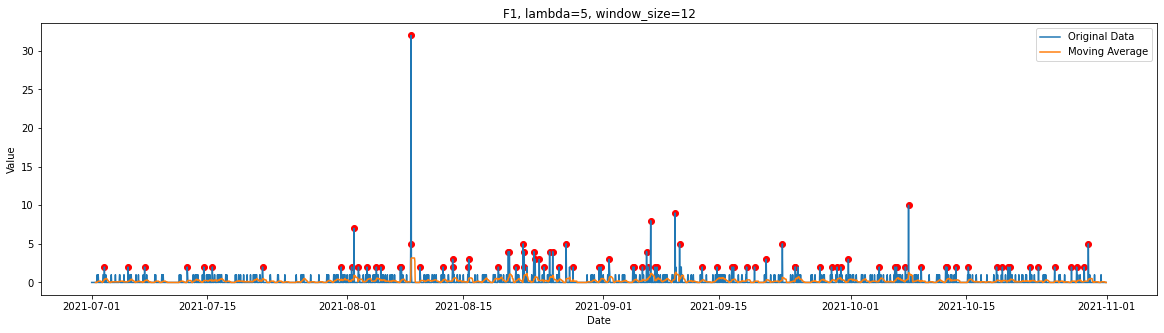

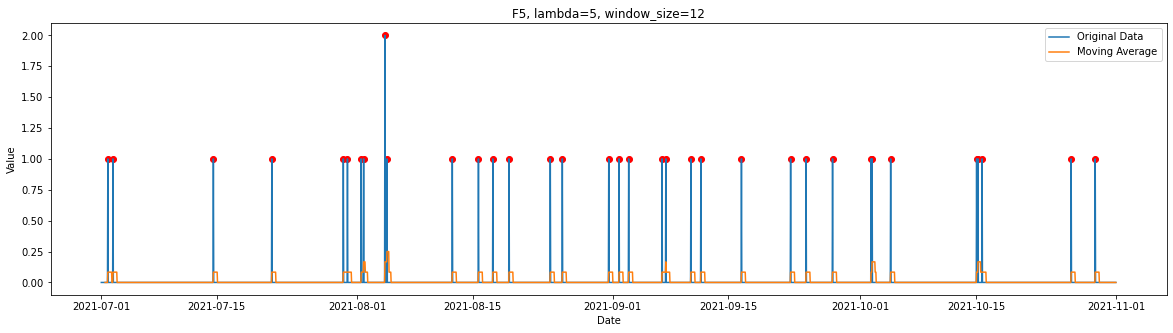

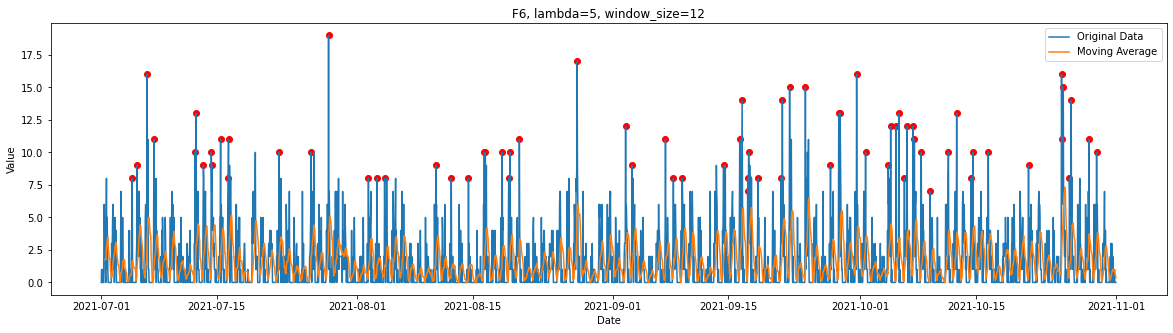

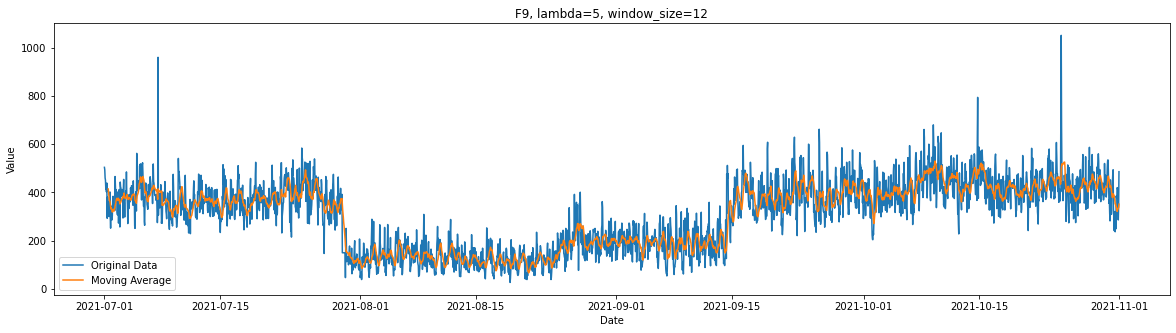

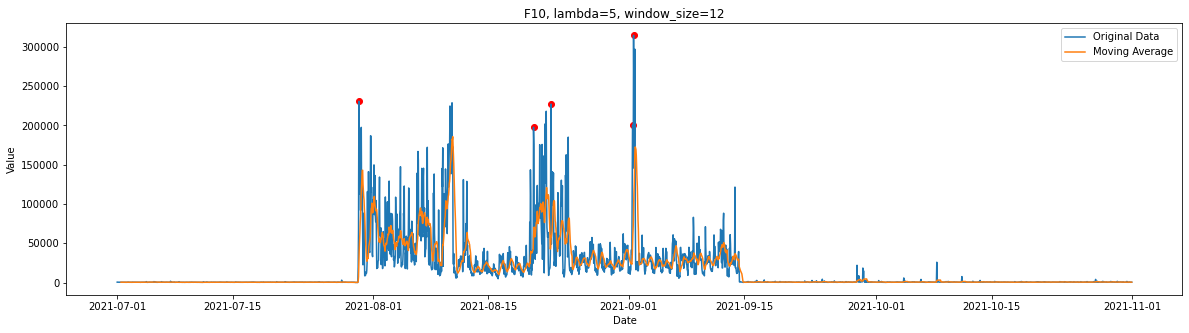

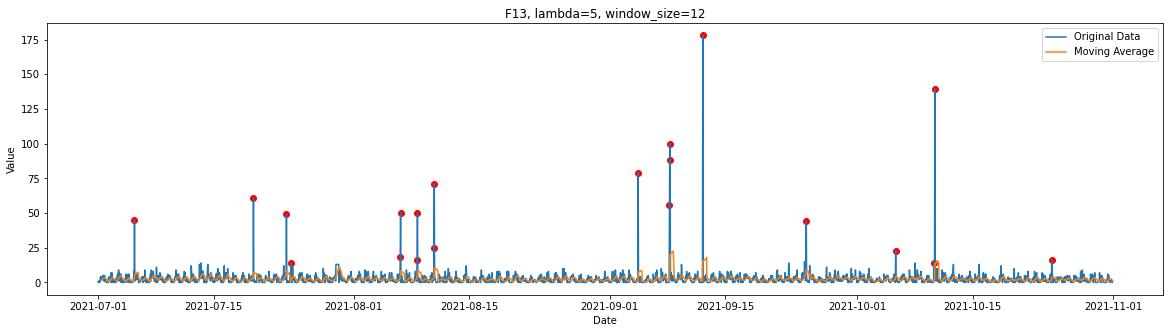

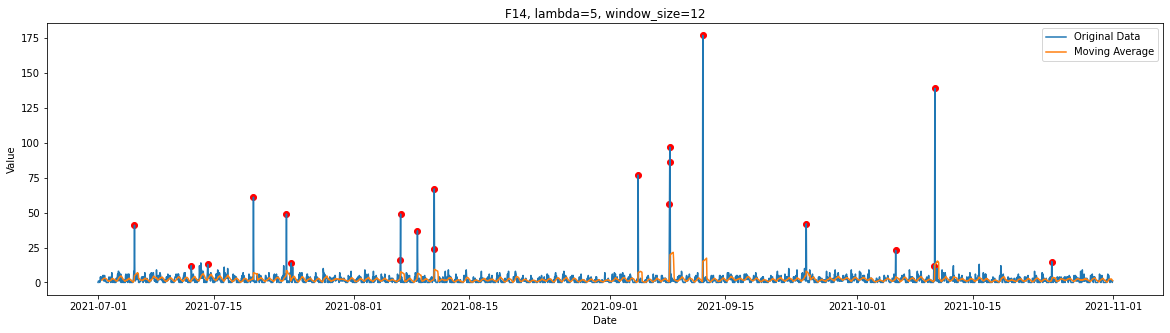

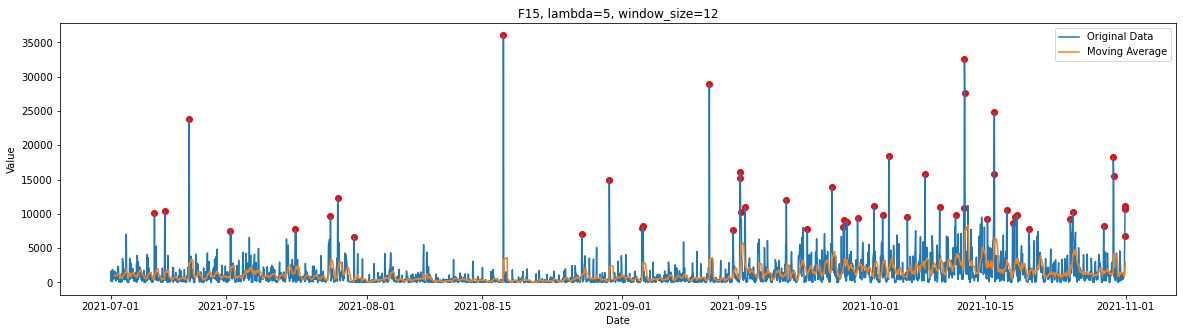

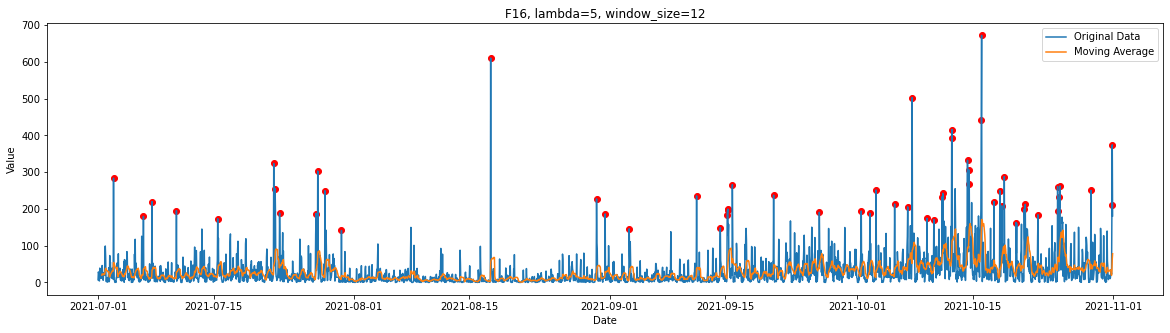

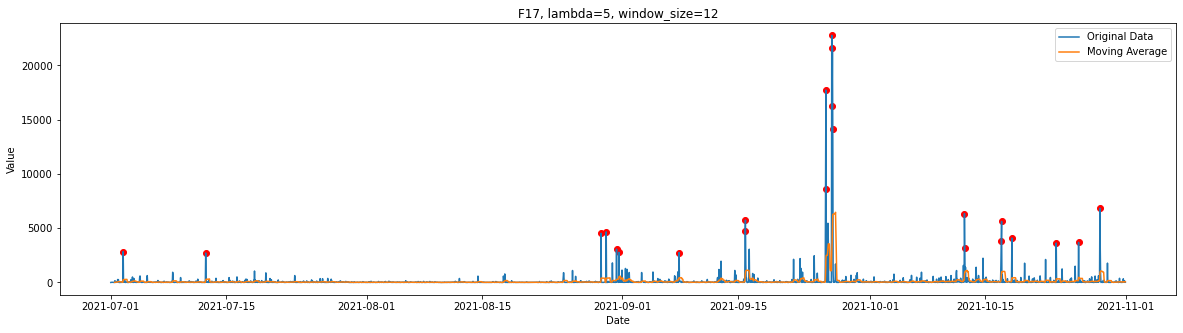

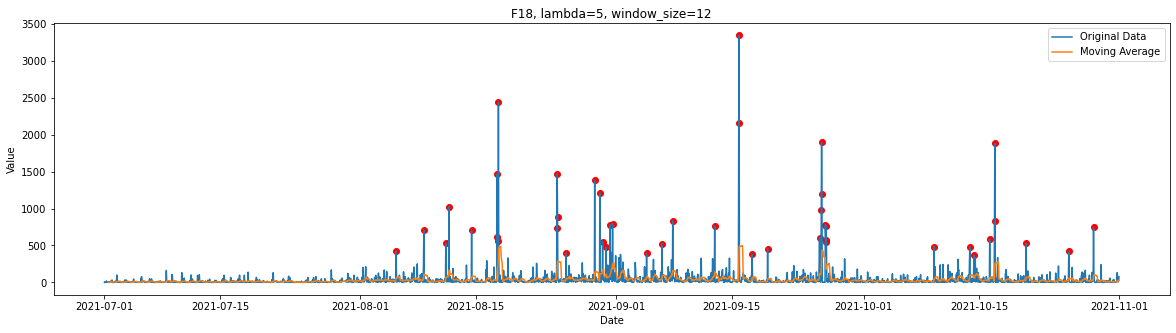

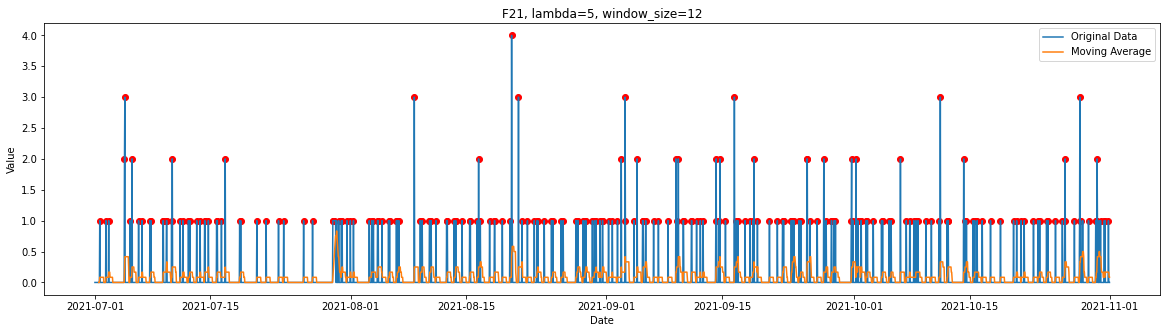

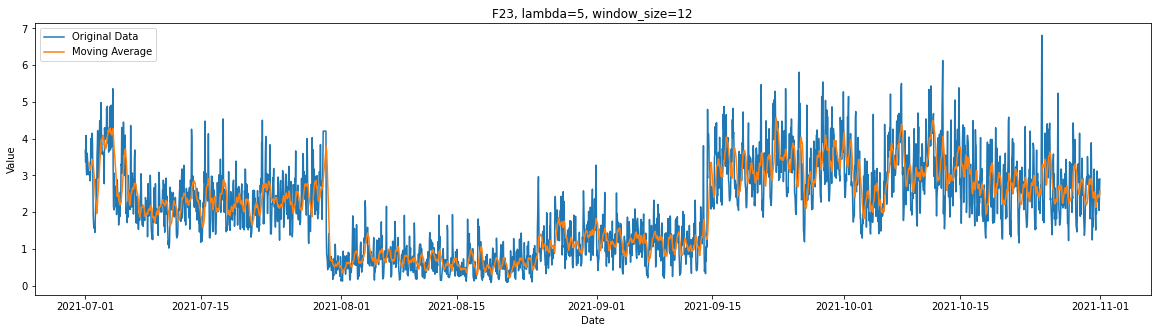

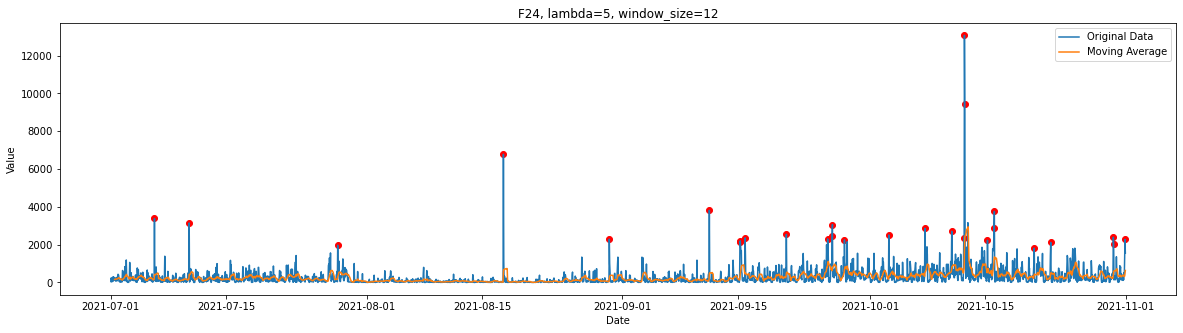

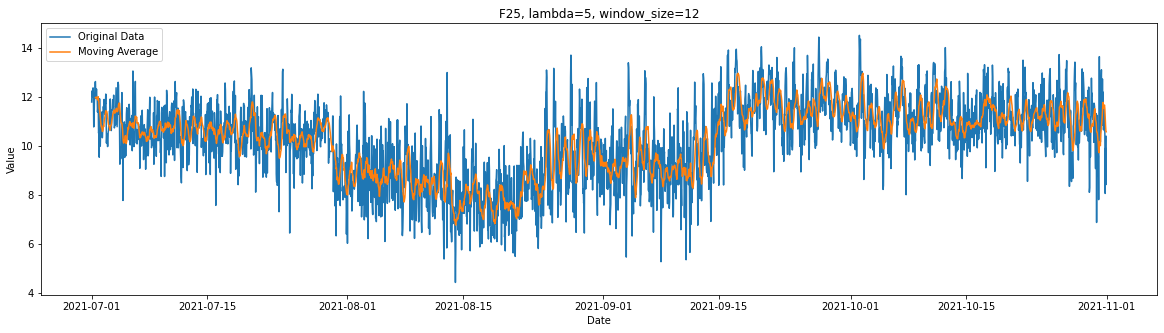

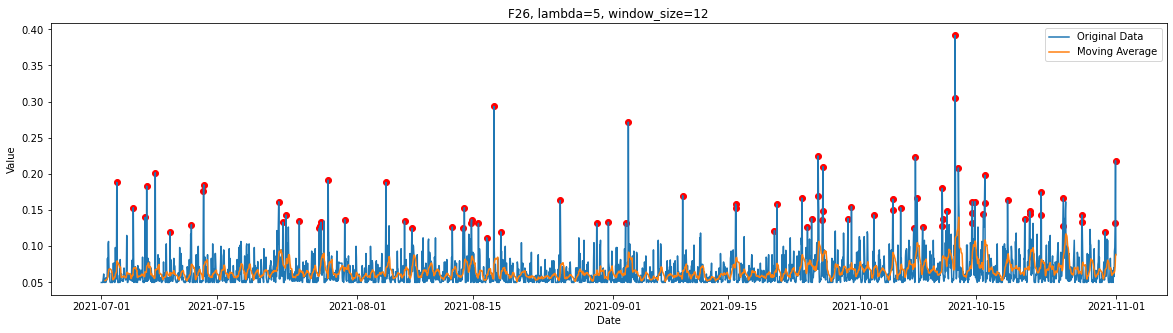

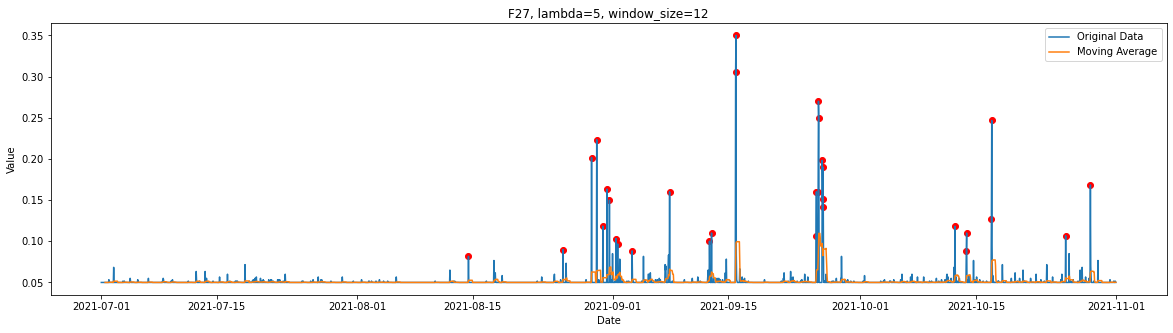

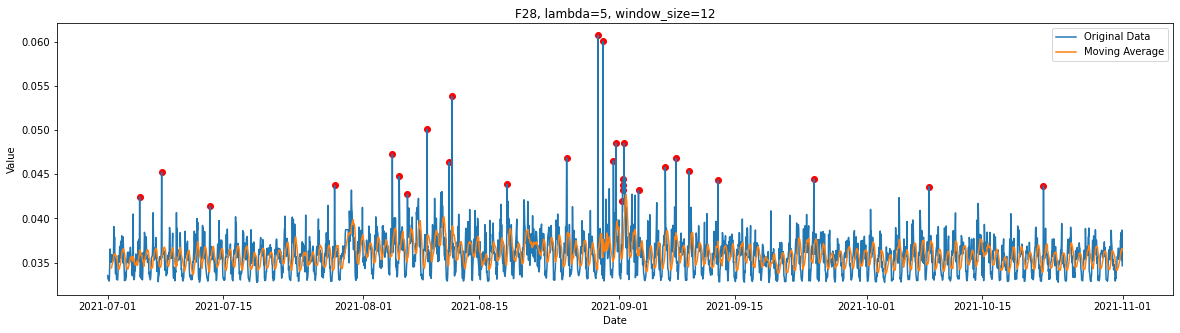

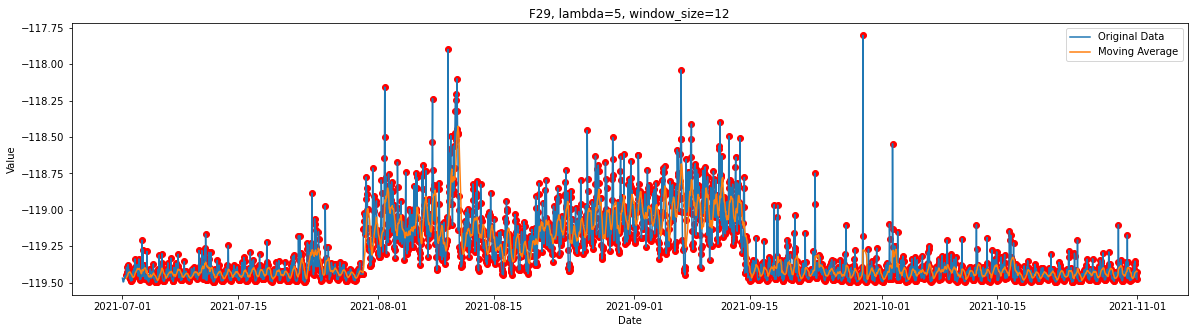

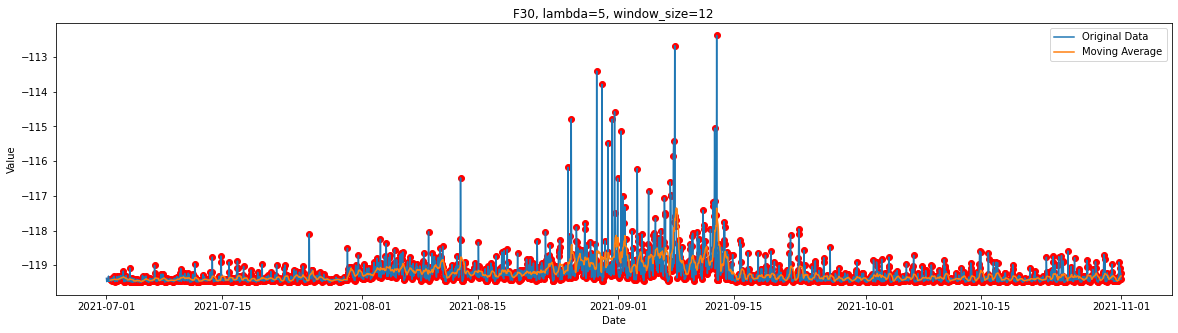

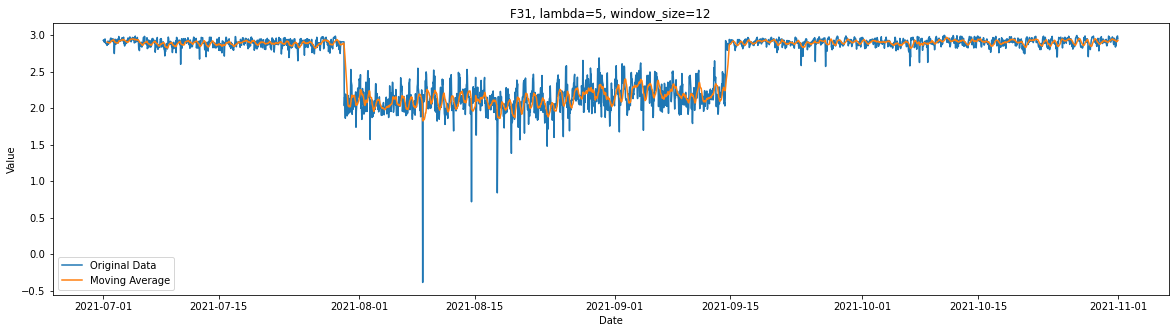

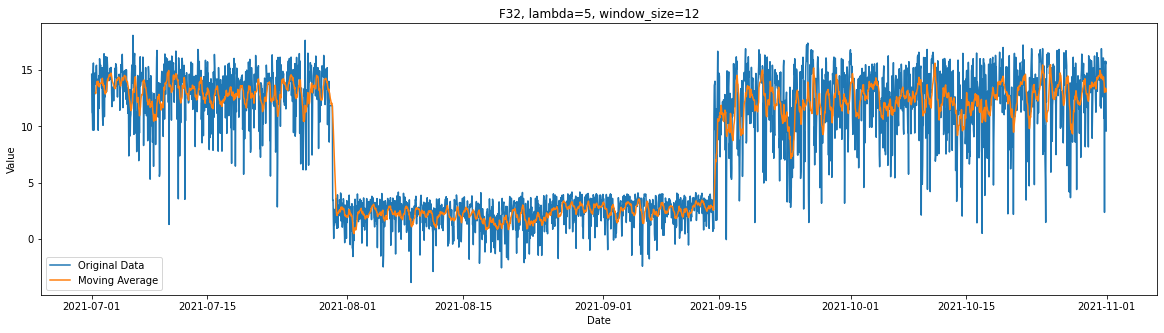

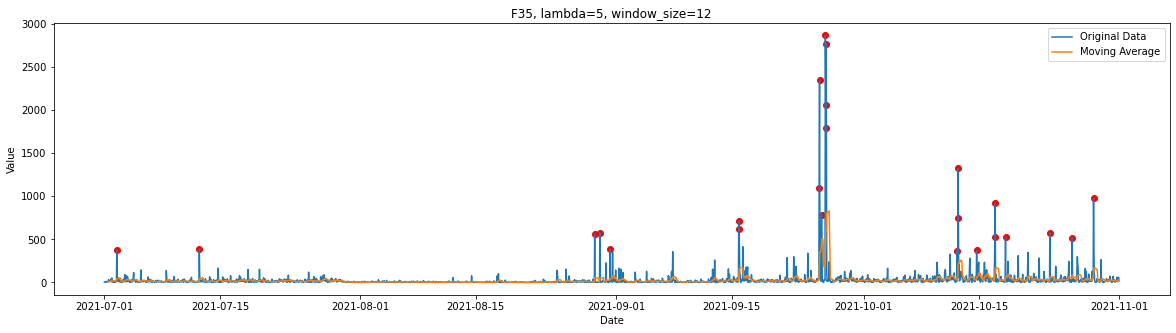

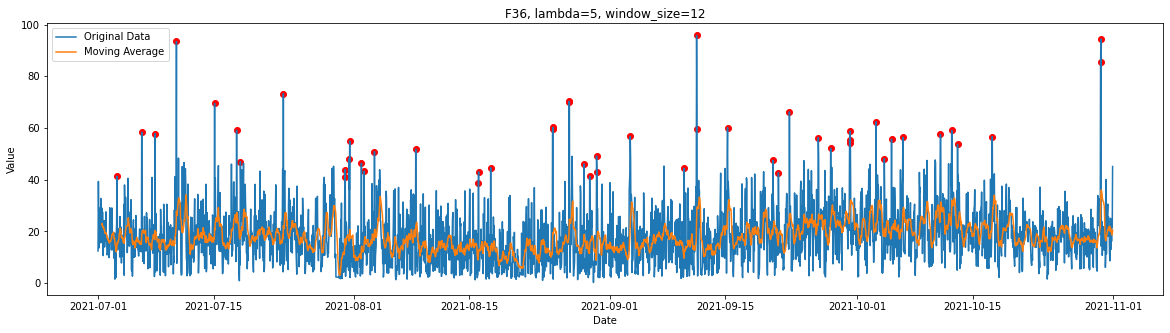

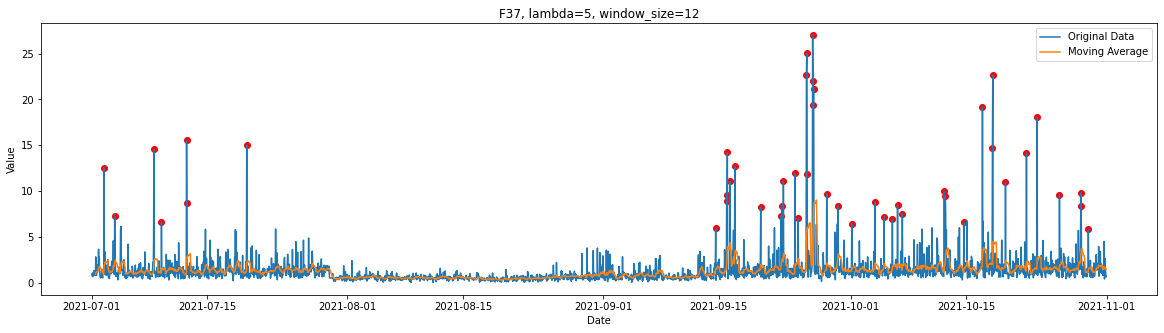

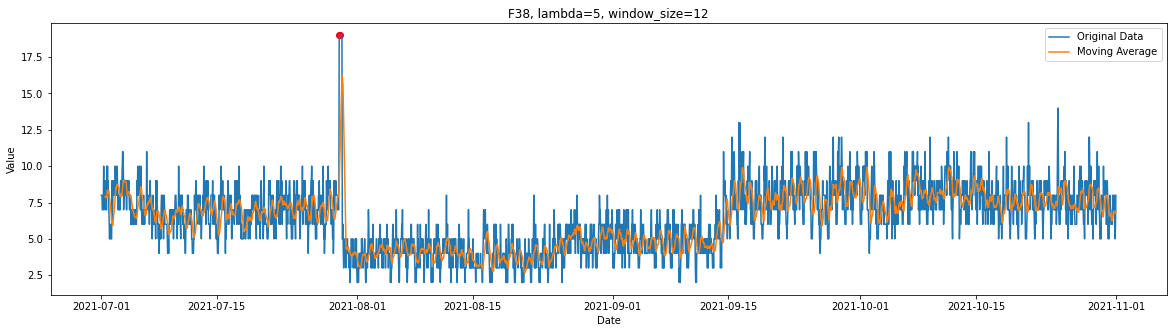

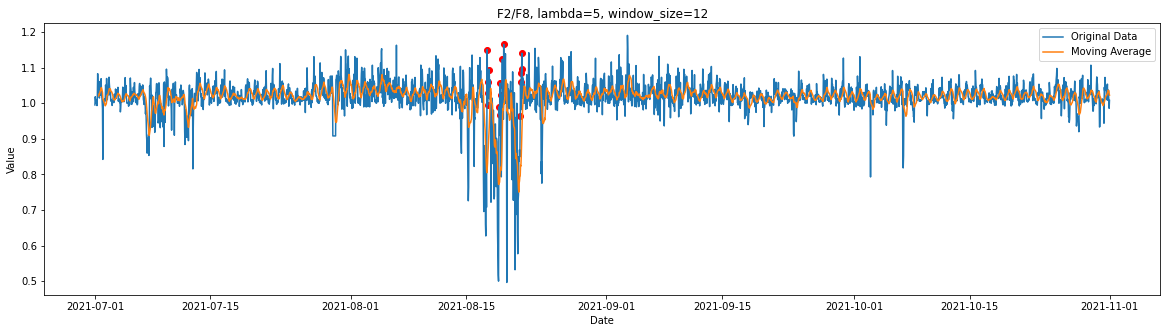

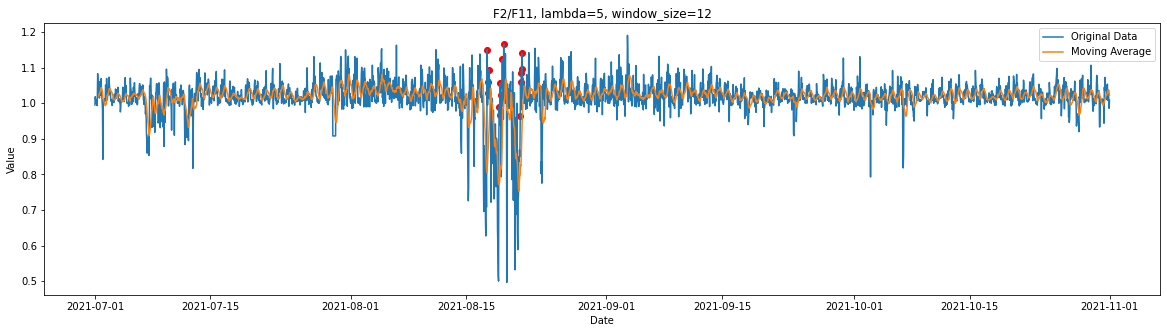

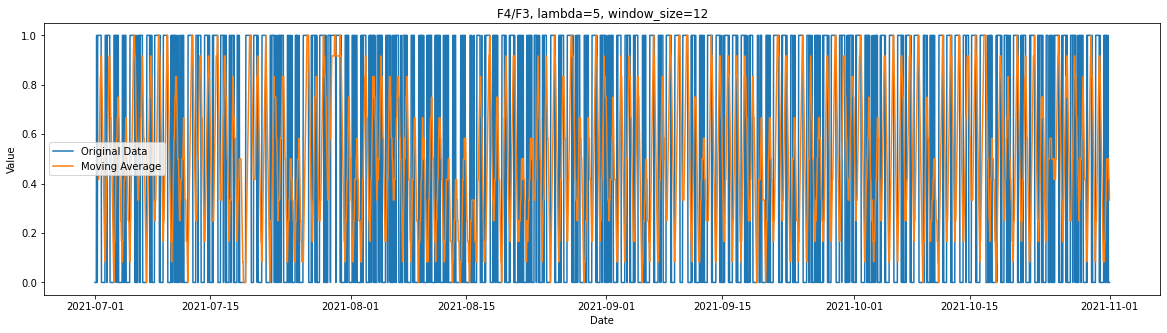

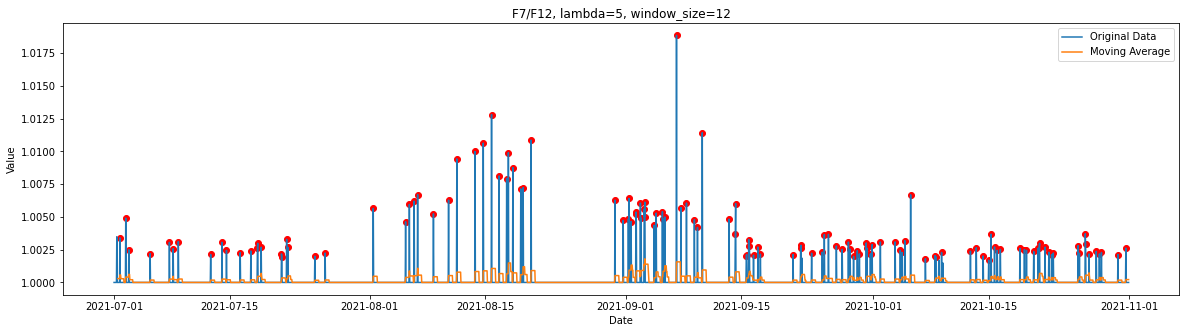

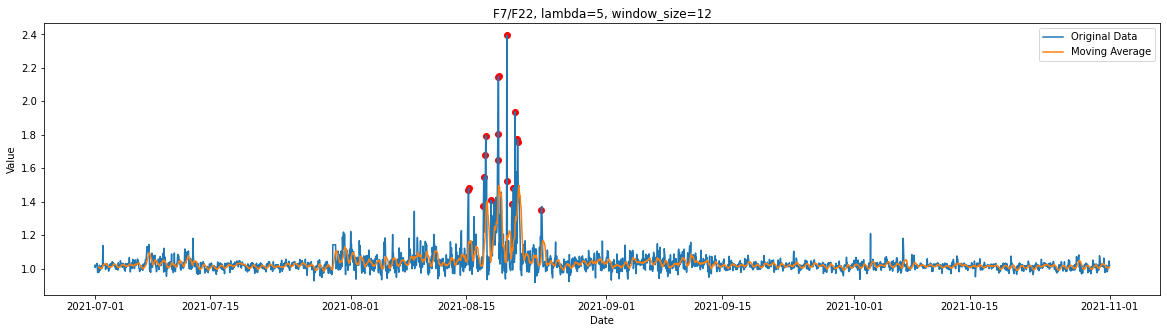

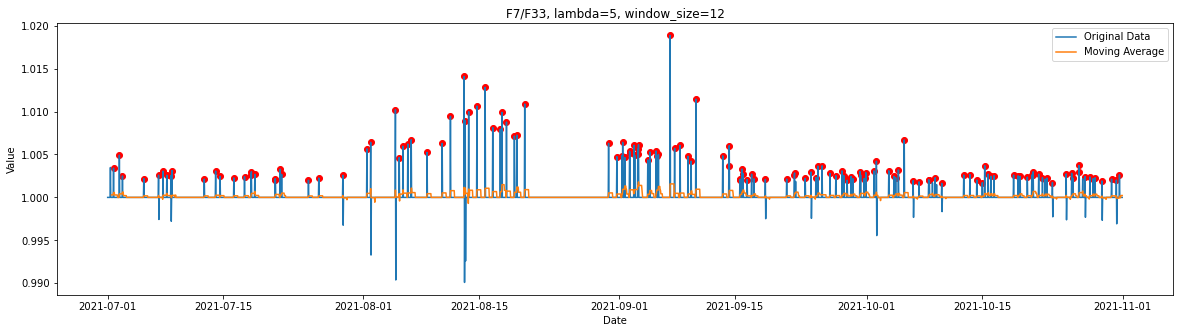

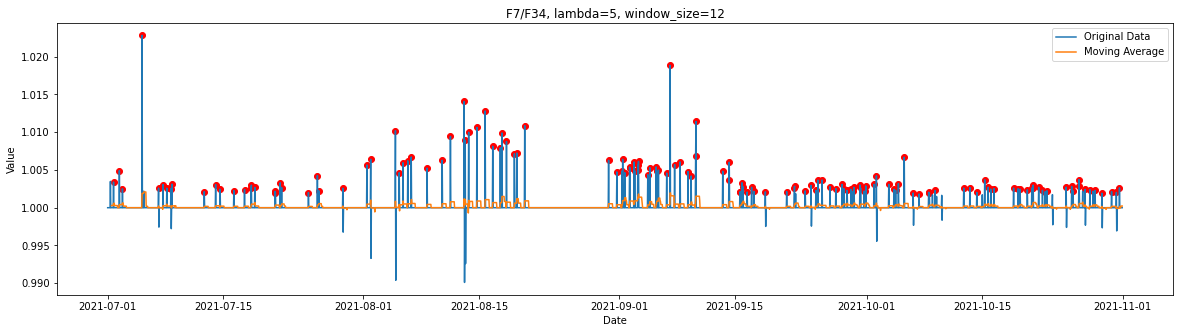

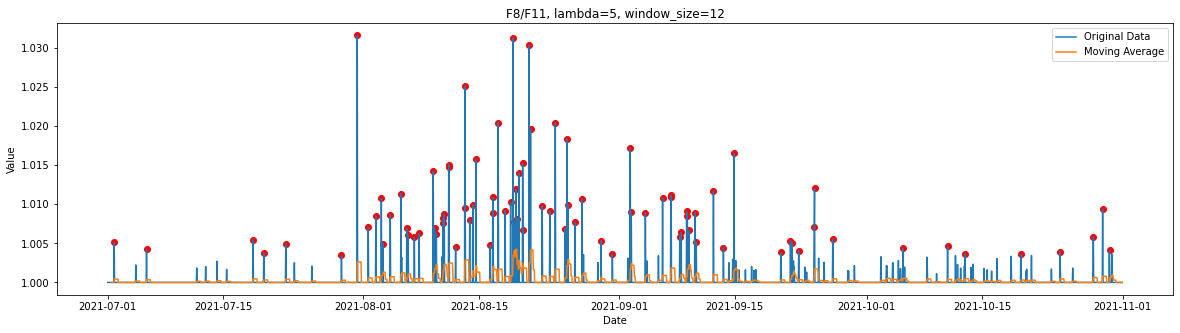

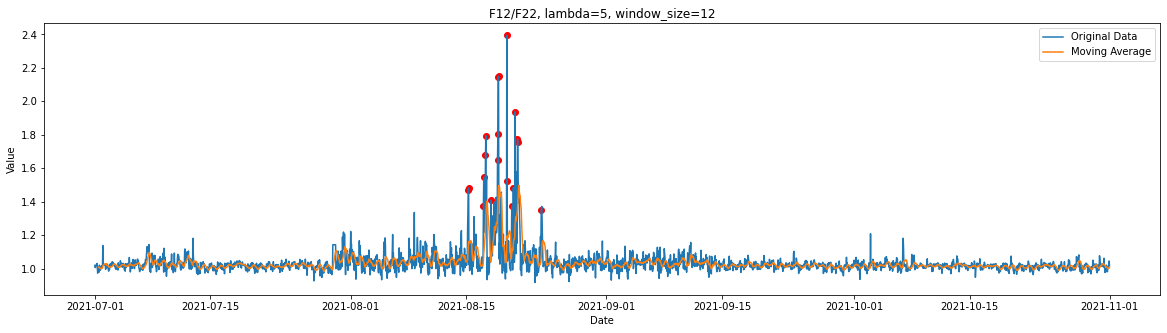

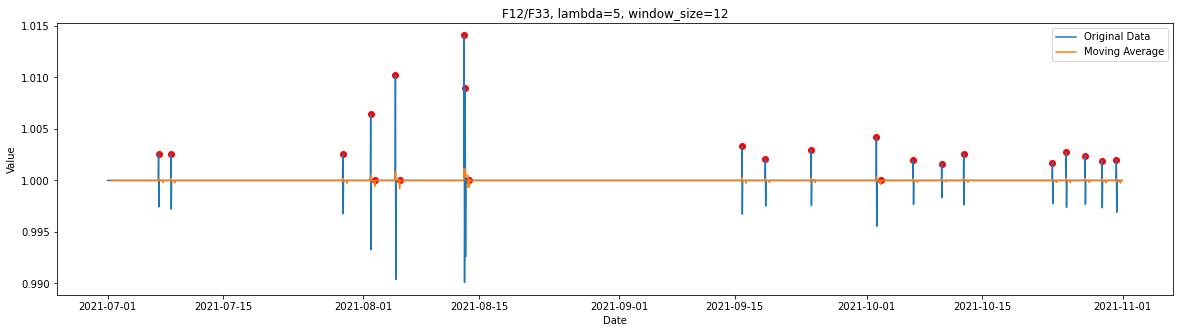

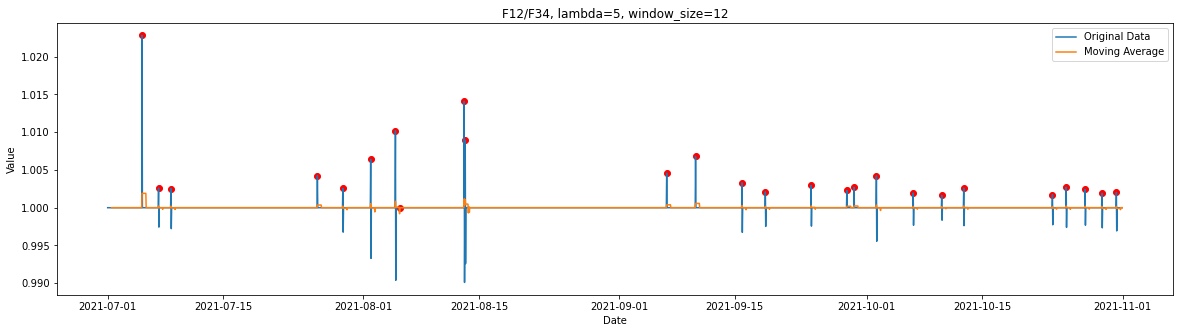

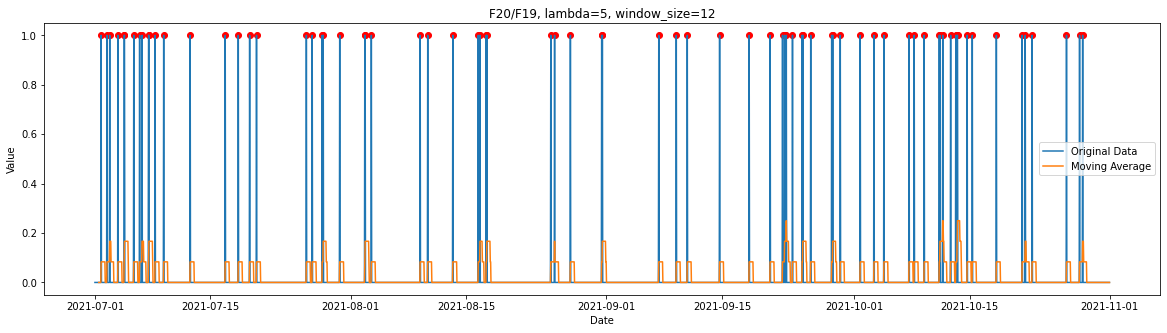

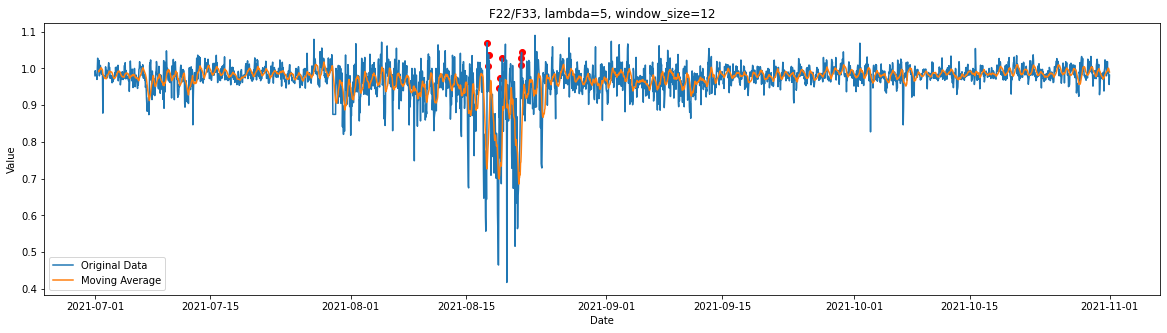

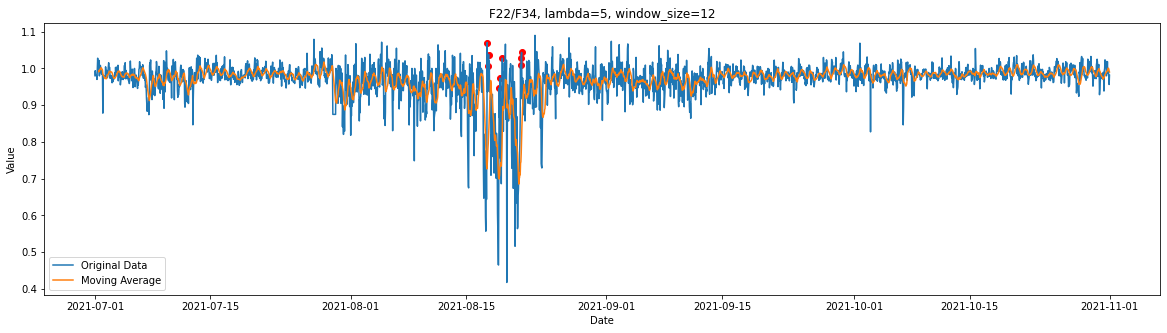

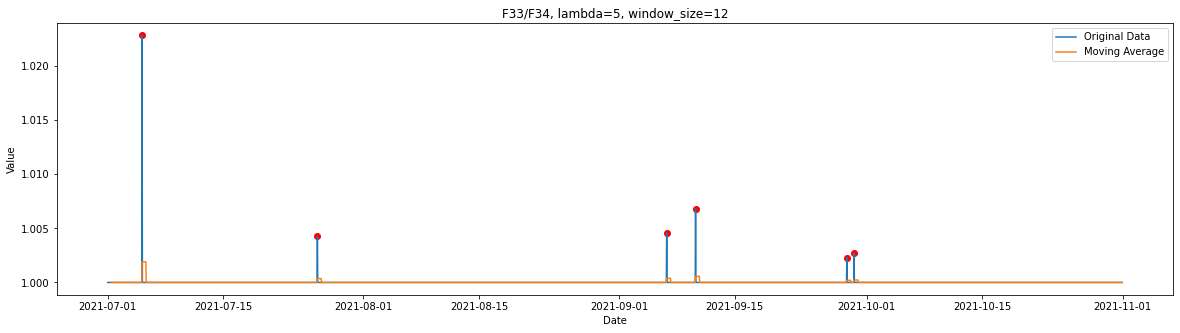

In [13]:
for col in df.columns:
    la=min_lamda
    w=min_window_size
    rolling_mean = df[col].rolling(window=w).mean()
    std = np.std(rolling_mean)
    threshold = la * std
    plt.plot(df.index, df[col], label='Original Data')
    plt.plot(rolling_mean.index, rolling_mean, label='Moving Average')
    plt.legend(loc='best')
    upper_limit = rolling_mean + threshold
    lower_limit = rolling_mean - threshold
    anomalies = (df[col].abs() > upper_limit)
    plt.scatter(df.index[anomalies], df[col][anomalies], color='red', label='Anomalies')
    plt.title(f"{col}, lambda={la}, window_size={w}")
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()

In [10]:
print(anomalies_array)

[[18.87517351 24.48443387 26.46490184 29.09230617 30.22341199 31.32890475
  32.50462688 33.47792319]
 [13.56913874 18.56203318 20.13351841 22.68738846 23.88046137 25.33379602
  25.63867407 26.53678366]
 [11.16894706 15.63636063 16.52290303 18.69918699 19.15113358 20.82011369
  21.23570626 22.49652984]
 [ 9.0463679  13.23121158 13.73190561 15.5074691  16.14201203 17.24667856
  18.09934563 18.86195386]
 [ 7.97144557 11.49200212 11.80927358 13.4609029  13.94672483 14.76551656
  15.34718091 16.22628726]
 [ 7.29641748 10.15929671 10.05023465 11.90842091 12.08027629 12.98003834
  13.23121158 13.93020028]
 [ 6.97914601  9.09759402  8.86872893 10.9053804  10.92520986 11.77870315
  11.89767995 12.51321964]
 [ 6.68914006  7.92435058  8.0111045  10.01057572 10.07997885 11.04170798
  10.97147862 11.29701236]
 [ 6.46357988  7.31376826  7.41291559  9.17856435  9.01166634 10.32619473
  10.09567718 10.49061405]
 [ 6.29007205  6.97336242  7.02458854  8.26971379  8.00779959  9.40990812
   9.37520656  9.

In [11]:
min_val = np.min(anomalies_array)
print(min_val)

6.290072047061934
